In [27]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

#### importing library to fetch data from twitter

In [4]:
pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 367.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tweepy
import csv
import random

In [6]:
consumer_key    = '0J2BJH2QOD2LvdGfyeWQoNWjW'
consumer_secret = '7cj0WRX7XcVoTO14kyqCv0ukXkM109VNHSFWQY1UdNRJJl88cM'

access_token  = '1596203419127410688-bSBcJm546AvFvGNjcJBopUEbTc5XCl'
access_token_secret = 'UDdxBIM31ZR6kUAVKLT6qLuXHrJv735tqVWGAIvCGChIr'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets for United Airlines in extended mode (means entire tweet will come and not just few words + link)

In [9]:
!pip install snscrape

import snscrape.modules.twitter as sntwitter
query = "#unitedAIRLINES"

tweets = []
limit = 200000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append(([tweet.date,tweet.content]))
        



In [10]:
data = pd.DataFrame(tweets,columns=['Date','Tweets'])

***DataFrame which had more number of data points i.e days to be considered***

In [14]:
stocks_dataf = pd.read_pickle('/kaggle/input/twitterunitedairlinesdataset/Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

In [25]:
ccdata = stocks_dataf[['adj_close_price']].copy()

In [11]:
data

,Date,Tweets
0,2022-11-30 20:33:24+00:00,United to End Service Between San Diego and Lo...
1,2022-11-30 19:40:49+00:00,ICAO: A899A2\nFlt: UAL934 #UnitedAirlines #EWR...
2,2022-11-30 19:15:50+00:00,https://t.co/Ar2GZkI47O \n#UnitedAirlines #Nat...
3,2022-11-30 17:59:01+00:00,if you need to switch your flight because of a...
4,2022-11-30 17:55:25+00:00,These blatant lies is a typical #baitandswitch...
...,...,...
199995,2016-04-04 15:51:46+00:00,"#UnitedAirlines 9hr delay. No apology, no wate..."
199996,2016-04-04 15:51:23+00:00,My flight has now been pushed another 6 hours....
199997,2016-04-04 15:47:24+00:00,@Independent @United_Airline \nShame on #Unit...
199998,2016-04-04 15:08:49+00:00,@DeltaAssist Cancel my flight and offer to sen...


In [12]:
val  = str(data['Date'][0]).split(' ')[0]
val



'2022-11-30'

In [13]:
data['Date'] = data['Date'].astype(str)

In [14]:
for i in range(len(data)):
    data['Date'][i] = data['Date'][i].split(' ')[0]

In [15]:
data['Date']

0         2022-11-30
1         2022-11-30
2         2022-11-30
3         2022-11-30
4         2022-11-30
             ...    
199995    2016-04-04
199996    2016-04-04
199997    2016-04-04
199998    2016-04-04
199999    2016-04-04
Name: Date, Length: 200000, dtype: object

In [53]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#unitedAIRLINES",lang ="en",since="2018-9-13", tweet_mode="extended").items(500)
fetched_tweets_data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [54]:
fetched_tweets_data

,Date,Tweets
0,2022-11-30,Flyers can now purchase seats on JSX flights b...
1,2022-11-30,"Hi, I am tracking the tweets mentioning #unite..."
2,2022-11-30,ICAO: #A2CB33\nFlt: #UAL906 #UnitedAirlines #F...
3,2022-11-30,Flight Cancellation know what to do\n#flightca...
4,2022-11-30,Reserve your Christmas flight Tickets with Uni...
...,...,...
257,2022-11-22,"United Airlines Booking Phone number, traveler..."
258,2022-11-22,RT @carolinajhong: I have spoken to at least 1...
259,2022-11-22,My ride over to London tonight 👋 🇬🇧 ✈️ \n\n#un...
260,2022-11-22,"RT @virtualUA: Monday pushback, guess our dest..."


#### Removing special character from each tweets

In [28]:
data  = pd.read_csv("/kaggle/input/ualtweets/Tweets.csv",lineterminator='\n')

In [29]:
# data.to_csv("Tweets.csv") #this is used when am downloading the new data set 

cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [30]:
cdata

,Date,Tweets
0,2022-11-30,United to End Service Between San Diego and Lo...
1,2022-11-30,ICAO A899A2Flt UAL934 UnitedAirlines EWRLHRFir...
2,2022-11-30,httpstcoAr2GZkI47O UnitedAirlines NatronEnergy...
3,2022-11-30,if you need to switch your flight because of a...
4,2022-11-30,These blatant lies is a typical baitandswitch ...
...,...,...
199995,2016-04-04,UnitedAirlines 9hr delay No apology no water n...
199996,2016-04-04,My flight has now been pushed another 6 hours ...
199997,2016-04-04,Independent UnitedAirline Shame on UnitedAirl...
199998,2016-04-04,DeltaAssist Cancel my flight and offer to send...


#### Creating a dataframe where we will combine the tweets date wise and store into

In [31]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])


In [32]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

#### All the tweets has been clubbed as per their date.

In [33]:
ccdata

,Date,Tweets
0,2022-11-30,United to End Service Between San Diego and Lo...
1,2022-11-29,JetBlue UnitedAirlines AlaskaAirlines donate ...
2,2022-11-28,ICAO A754B5Flt UAL2400 UnitedAirlines BOSSFOF...
3,2022-11-27,ICAO A34358Flt UAL526 UnitedAirlines AMMIADFi...
4,2022-11-26,ICAO A94B08Flt UAL2078 UnitedAirlines BOSORDF...
...,...,...
2426,2016-04-09,planelife unitedairlines united httpstcodQWEU...
2427,2016-04-08,UnitedAirlines United amp Delta Drop Newark S...
2428,2016-04-07,UAB787 PENTAXB787 HNDUnitedAirlines httpstco...
2429,2016-04-06,united moments from connecting to the Jetbrid...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [34]:
!pip install yfinance

In [35]:
import datetime as dt
import yfinance as yf
sdate = dt.datetime(2016,4,1)
edate = dt.datetime(2022,11,30)
uav = yf.download('UAL', 
                      start=sdate, 
                      end=edate, 
                      progress=True,
)
uav.to_csv('UnitedAirlines.csv')

[*********************100%***********************]  1 of 1 completed


In [36]:
uav = pd.read_csv('/kaggle/working/UnitedAirlines.csv')

In [37]:
uav.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [38]:
ccdata['Prices']=""

In [39]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(uav)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=uav.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(uav.Close[j])

#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [40]:
ccdata

,Date,Tweets,Prices
0,2022-11-30,United to End Service Between San Diego and Lo...,
1,2022-11-29,JetBlue UnitedAirlines AlaskaAirlines donate ...,43
2,2022-11-28,ICAO A754B5Flt UAL2400 UnitedAirlines BOSSFOF...,43
3,2022-11-27,ICAO A34358Flt UAL526 UnitedAirlines AMMIADFi...,
4,2022-11-26,ICAO A94B08Flt UAL2078 UnitedAirlines BOSORDF...,
...,...,...,...
2426,2016-04-09,planelife unitedairlines united httpstcodQWEU...,
2427,2016-04-08,UnitedAirlines United amp Delta Drop Newark S...,53
2428,2016-04-07,UAB787 PENTAXB787 HNDUnitedAirlines httpstco...,53
2429,2016-04-06,united moments from connecting to the Jetbrid...,55


#### So we take the mean for the close price and put it in the blank value

In [41]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
        mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [42]:
ccdata

,Date,Tweets,Prices
0,2022-11-30,United to End Service Between San Diego and Lo...,59
1,2022-11-29,JetBlue UnitedAirlines AlaskaAirlines donate ...,43
2,2022-11-28,ICAO A754B5Flt UAL2400 UnitedAirlines BOSSFOF...,43
3,2022-11-27,ICAO A34358Flt UAL526 UnitedAirlines AMMIADFi...,59
4,2022-11-26,ICAO A94B08Flt UAL2078 UnitedAirlines BOSORDF...,59
...,...,...,...
2426,2016-04-09,planelife unitedairlines united httpstcodQWEU...,59
2427,2016-04-08,UnitedAirlines United amp Delta Drop Newark S...,53
2428,2016-04-07,UAB787 PENTAXB787 HNDUnitedAirlines httpstco...,53
2429,2016-04-06,united moments from connecting to the Jetbrid...,55


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [43]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [44]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''

ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-11-30,United to End Service Between San Diego and Lo...,59,,,,
1,2022-11-29,JetBlue UnitedAirlines AlaskaAirlines donate ...,43,,,,
2,2022-11-28,ICAO A754B5Flt UAL2400 UnitedAirlines BOSSFOF...,43,,,,
3,2022-11-27,ICAO A34358Flt UAL526 UnitedAirlines AMMIADFi...,59,,,,
4,2022-11-26,ICAO A94B08Flt UAL2078 UnitedAirlines BOSORDF...,59,,,,
...,...,...,...,...,...,...,...
2426,2016-04-09,planelife unitedairlines united httpstcodQWEU...,59,,,,
2427,2016-04-08,UnitedAirlines United amp Delta Drop Newark S...,53,,,,
2428,2016-04-07,UAB787 PENTAXB787 HNDUnitedAirlines httpstco...,53,,,,
2429,2016-04-06,united moments from connecting to the Jetbrid...,55,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [45]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-11-30,United to End Service Between San Diego and Lo...,59,0.9966,0.077,0.774,0.9966
1,2022-11-29,JetBlue UnitedAirlines AlaskaAirlines donate ...,43,0.988,0.013,0.9,0.988
2,2022-11-28,ICAO A754B5Flt UAL2400 UnitedAirlines BOSSFOF...,43,0.9978,0.011,0.911,0.9978
3,2022-11-27,ICAO A34358Flt UAL526 UnitedAirlines AMMIADFi...,59,-0.9477,0.086,0.85,-0.9477
4,2022-11-26,ICAO A94B08Flt UAL2078 UnitedAirlines BOSORDF...,59,0.9952,0.007,0.944,0.9952
...,...,...,...,...,...,...,...
2426,2016-04-09,planelife unitedairlines united httpstcodQWEU...,59,0.9947,0.113,0.721,0.9947
2427,2016-04-08,UnitedAirlines United amp Delta Drop Newark S...,53,0.9913,0.076,0.809,0.9913
2428,2016-04-07,UAB787 PENTAXB787 HNDUnitedAirlines httpstco...,53,0.9993,0.095,0.714,0.9993
2429,2016-04-06,united moments from connecting to the Jetbrid...,55,0.9993,0.059,0.79,0.9993


In [48]:
val =0 
for i in range(len(ccdata)):
    if i >150:
        val = val+ ccdata['Negative'][i]
    
val

180.34200000000004

In [49]:
val = 0
for i in range(len(ccdata)):
    if i>150:
        val = val+ ccdata['Positive'][i]
    
val

1809.085499999996

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  90.9502262443439
% of negative tweets=  9.049773755656108


[]

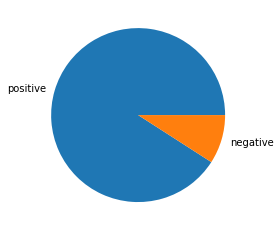

In [50]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [46]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [47]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2022-11-30,59,0.9966,0.077,0.774,0.9966
1,2022-11-29,43,0.988,0.013,0.9,0.988
2,2022-11-28,43,0.9978,0.011,0.911,0.9978
3,2022-11-27,59,-0.9477,0.086,0.85,-0.9477
4,2022-11-26,59,0.9952,0.007,0.944,0.9952
...,...,...,...,...,...,...
2426,2016-04-09,59,0.9947,0.113,0.721,0.9947
2427,2016-04-08,53,0.9913,0.076,0.809,0.9913
2428,2016-04-07,53,0.9993,0.095,0.714,0.9993
2429,2016-04-06,55,0.9993,0.059,0.79,0.9993


#### Dividing the dataset into train and test.

In [49]:
train_start_index = '0'
train_end_index = '1800'
test_start_index = '1801'
test_end_index = '2430'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [50]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [51]:
print(numpy_df_train)

[[ 0.077   0.9966]
 [ 0.013   0.988 ]
 [ 0.011   0.9978]
 ...
 [ 0.111   0.4843]
 [ 0.15   -0.9979]
 [ 0.151  -0.9993]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [57]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [53]:
print(numpy_df_test)

[[ 0.179  -0.9993]
 [ 0.137   0.9952]
 [ 0.112   0.9868]
 ...
 [ 0.095   0.9993]
 [ 0.059   0.9993]
 [ 0.089   0.9817]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [54]:
y_train = pd.DataFrame(train['Prices'])

y_test = pd.DataFrame(test['Prices'])
print(y_test)

      Prices
1801      59
1802      59
1803      59
1804      67
1805      67
...      ...
2426      59
2427      53
2428      53
2429      55
2430      55

[630 rows x 1 columns]


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [55]:
!pip install treeinterpreter

In [58]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)
rf_prediction=rf.predict(numpy_df_test) #is as same as Prediction done by treeintrepeter using ti 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


#### Making Predictions

In [60]:
rf_prediction, bias, contributions = ti.predict(rf, numpy_df_test)

#### Importing matplotlib library for plotting graph

In [62]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [63]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=rf_prediction[0:], index = idx, columns=['Prices'])

In [64]:
predictions_df_

,Prices
1801,61.360000
1802,71.320000
1803,57.720000
1804,68.070000
1805,59.230000
...,...
2426,55.940000
2427,50.360000
2428,57.126000
2429,74.093333


#### Plotting the graph for the Predicted_price VS Actual Price

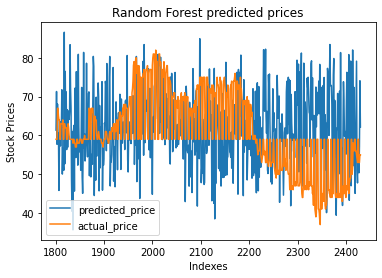

In [83]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [66]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [68]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
linear_reg_predictions = pd.DataFrame(data=y_pred[0:], index = idx, columns=['Prices'])

In [75]:
import sklearn.metrics as met
print(reg.coef_)
mse = met.mean_squared_error(y_test,y_pred)
print(mse)
print(np.sqrt(mse))

[[145.19233933   5.4310132 ]]
92.3298889908561
9.608844310886512


In [76]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)

mlpc.fit(numpy_df_train ,y_train)   
mlpc_prediction = mlpc.predict(numpy_df_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = np.arange(int(test_start_index),int(test_end_index)+1)
mlpc_prediction = pd.DataFrame(data=mlpc_prediction[0:], index = idx, columns=['Prices'])

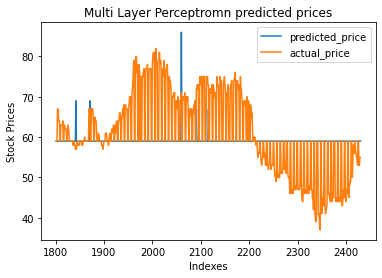

In [82]:
ax = mlpc_prediction.rename(columns={"Prices": "predicted_price"}).plot(title='Multi Layer Perceptromn predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("MLPmodel.png")

In [87]:
met.accuracy_score(y_test,mlpc_prediction)

0.33650793650793653

### NOTE: Since our dataset is not detailed as much for predictionand as you can see that fetching 25000 tweets could only make data for just 600 days.Also the prediction is not very great in such  dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


### Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [132]:
stocks_dataf = pd.read_pickle('/kaggle/input/twitterunitedairlinesdataset/Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

## New dataset

In [133]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


#### Removing dot (.) and space from the Tweets

In [134]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,adj_close_price,Tweets
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
...,...,...
2016-12-27,19945,Should the U.S. Embassy Be Moved From Tel Avi...
2016-12-28,19833,"When Finding the Right Lawyer Seems Daunting,..."
2016-12-29,19819,Does Empathy Guide or Hinder Moral Action?. C...
2016-12-30,19762,Shielding Seized Assets From Corruption’s Clu...


Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [154]:
dataframe = pd.DataFrame(stocks_dataf[['adj_close_price']].copy(),columns=['adj_close_price','Comp','Negative','Neutral','Positive'])

In [156]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in dataframe.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
        dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
        dataframe['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        dataframe['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        # dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

NameError: name 'dataframe' is not defined

In [129]:
dataframe

,Comp,Negative,Neutral,Positive,adj_close_price
2007-01-01,0.9966,NaN,NaN,NaN,12469
2007-01-02,0.988,NaN,NaN,NaN,12472
2007-01-03,0.9978,NaN,NaN,NaN,12474
2007-01-04,-0.9477,NaN,NaN,NaN,12480
2007-01-05,0.9952,NaN,NaN,NaN,12398
...,...,...,...,...,...
2016-12-27,,NaN,NaN,NaN,19945
2016-12-28,,NaN,NaN,NaN,19833
2016-12-29,,NaN,NaN,NaN,19819
2016-12-30,,NaN,NaN,NaN,19762


% of positive tweets=  45.414727621133316

% of negative tweets=  54.39364905557076


[]

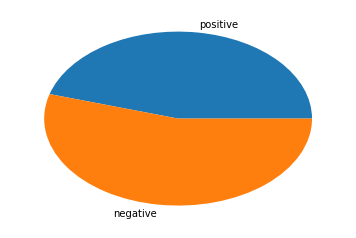

In [282]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [241]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]

TypeError: Expected unicode, got pandas._libs.properties.CachedProperty

In [284]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [285]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [286]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [217]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [218]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

NameError: name 'numpy_dataframe_train' is not defined

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


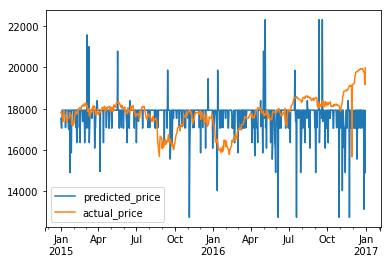

In [253]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
"""Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
The ith element represents the number of Neutralrons in the ith
hidden layer."""
mlpc.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = mlpc.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] +4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

In [254]:
print(mlpc.score(numpy_dataframe_train, train['adj_close_price']))
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))

0.006844626967830253


C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


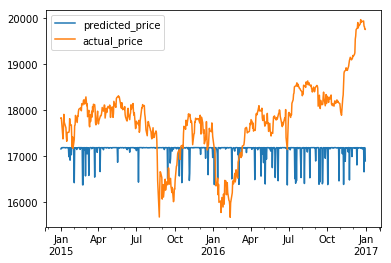

In [289]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 

.ix is deprecated. Please use

.loc for label based indexing or

.iloc for positional indexing



See the documentation here:

http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

  del sys.path[0]

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 

.ix is deprecated. Please use

.loc for label based indexing or

.iloc for positional indexing



See the documentation here:

http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

  

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 

.ix is deprecated. Please use

.loc for label based indexing or

.iloc for positional indexing



See the documentation here:

http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

  del sys.path[0]

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel

0.919672131147541


"predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])\npredictions_dataframe1.plot(color='orange')\ntrain['adj_close_price'].plot.line(color='green')"

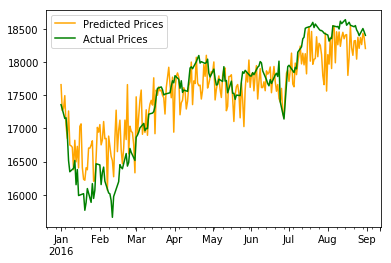

In [299]:
from treeinterpreter import treeinterpreter as tree_interpreter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])

    prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_test)
    prediction_list.append(prediction)
    #print("ACCURACY= ",rf.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']
    #predictions_dataframe_list.plot()
    #predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    #predictions_dataframe_list_average.plot()
prediction = rf.predict(numpy_dataframe_train)
#print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
#stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
predictions_dataframe1.plot(color=['orange','green'])
print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
"""predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')"""

## Hence we are achieving the accuracy of 91.96 % using RANDOM FOREST REGRESSOR